In [2]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target','flower_name'],axis ='columns'),df.target,test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))
cm

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  9]], dtype=int64)

<Axes: >

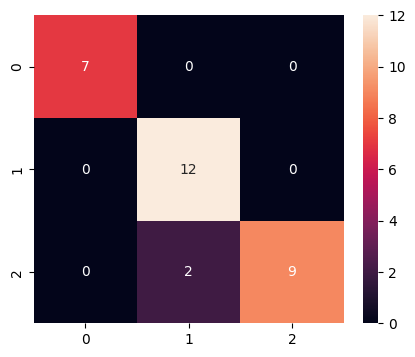

In [87]:
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)